In [3]:
# General libs for file paths, data extraction, etc
from glob import glob
from pathlib import Path
from os.path import basename
import zipfile # To extract zipfiles
import urllib3 
urllib3.disable_warnings() # Disable warnings for data download via API

# Libraries for working with multi-dimensional arrays
import numpy as np
import xarray as xr
import xarray.plot as xplot
import pandas as pd

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from datetime import datetime

import xclim as xc

In [21]:
file1='/scratch2/mfeldmann/seminar_mars/HW_EU_20230702.nc'
Pangu_July02 = xr.open_dataset(file1)
Pangu_July02.step

<xarray.DataArray 'step' (step: 14)>
array([ 842400000000000,  864000000000000,  885600000000000,  907200000000000,
        928800000000000,  950400000000000,  972000000000000,  993600000000000,
       1015200000000000, 1036800000000000, 1058400000000000, 1080000000000000,
       1101600000000000, 1123200000000000], dtype='timedelta64[ns]')
Coordinates:
  * step               (step) timedelta64[ns] 9 days 18:00:00 ... 13 days 00:...
    valid_time         (step) datetime64[ns] ...
    time               datetime64[ns] ...
    meanSea            float64 ...
    heightAboveGround  float64 ...
Attributes:
    long_name:      time since forecast_reference_time
    standard_name:  forecast_period

TypeError: No numeric data to plot.

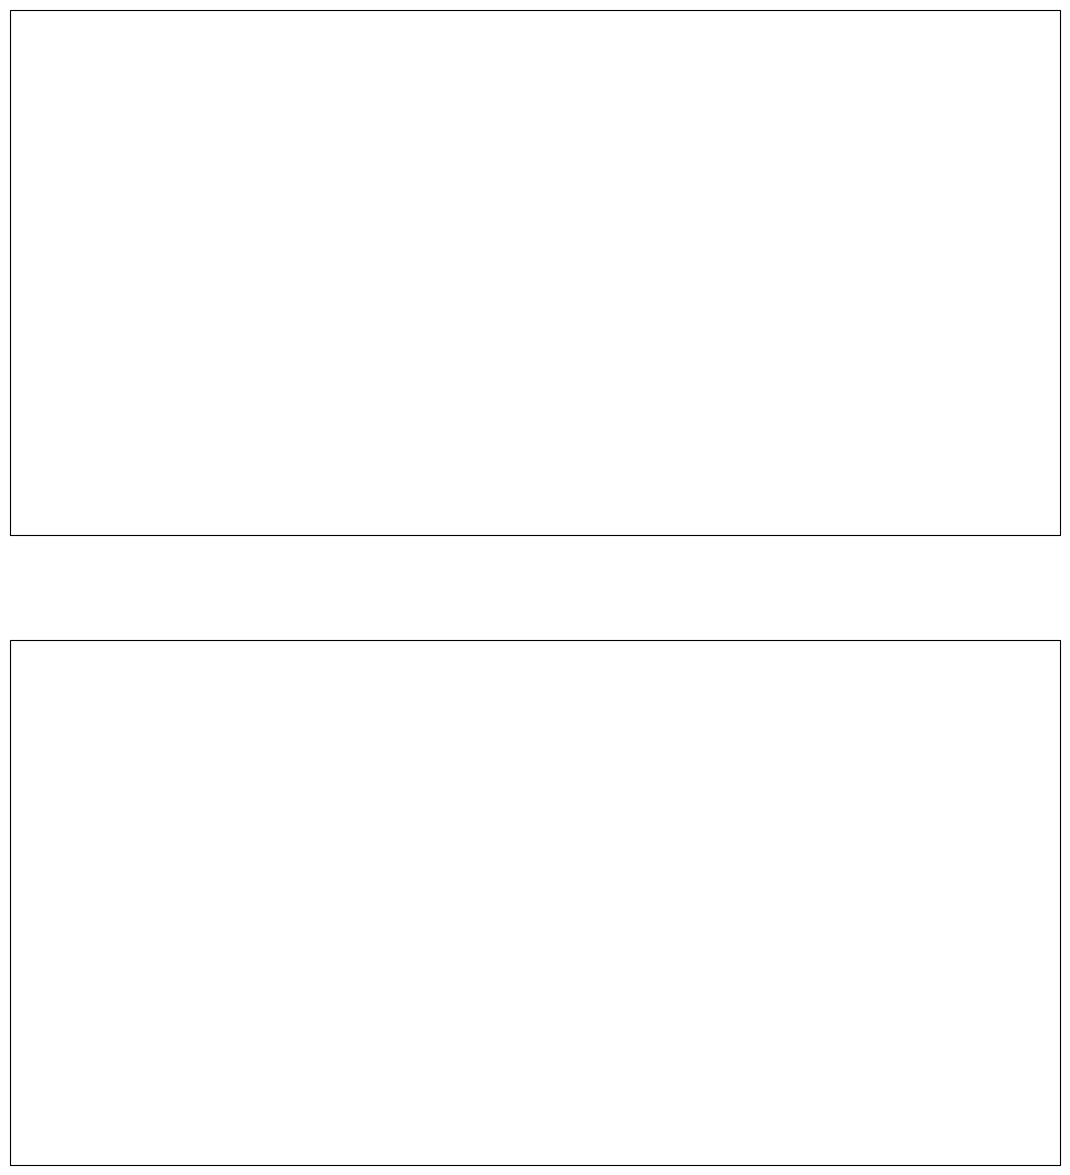

In [96]:
# Create own color ramp
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['blue', 'lightblue', 'orange', 'red'])

# Define the longitude and latitude ranges
lon_range = slice(-30, 30)
lat_range = slice(20, 50)

# Select the 2-meter temperature data for the specified longitude and latitude ranges
t2m_sliced_Pangu = Pangu_July02['t2'].sel(longitude=lon_range, latitude=lat_range)-273.15

# Select specific timesteps
t2m_selected_timesteps = t2m_sliced_Pangu['step'].isel(step=slice(1,2,3))

# Plot the 2-meter temperature for the selected timesteps
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 15), subplot_kw={'projection': ccrs.PlateCarree()})
for i, ax in enumerate(axes.flat):
    plot_data = t2m_sliced_Pangu.sel(step=t2m_selected_timesteps[i])
    rounded_time = plot_data.time.dt.round('min')  # Round the time values to the nearest minute
    xplot.contourf(plot_data, ax=ax, cmap=cmap, levels=20, cbar_kwargs={'label': '2 Meter Temperature [°C]'})
    ax.coastlines()
    ax.gridlines(draw_labels=False)  # Draw gridlines only for the bottom and left axes
    ax.set_ylabel('Latitude', fontsize=12)
    ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
    ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
    ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
    ax.set_title(rounded_time.values, fontsize=12)  # Set the title with rounded time values

# Show the plot
plt.show()

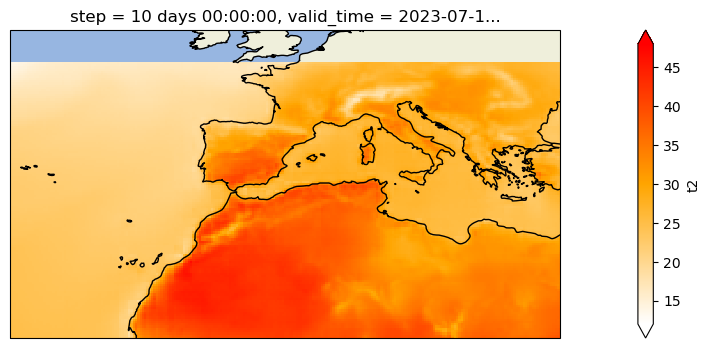

In [37]:
#Map of 2m temperature in C at step 1: July 12 Time Stamp 12:00:00
vmin = 12
vmax = 48
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-30, 30, 20, 50])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-');
(Pangu_July02.t2.sel(step=Pangu_July02.step[1])-273.15).plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)

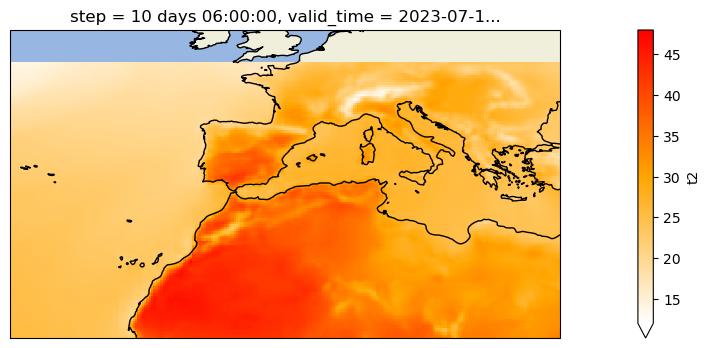

In [38]:
#Map of 2m temperature in C at step 1: July 12 Time Stamp 12:00:00
vmin = 12
vmax = 48
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-30, 30, 20, 50])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-');
(Pangu_July02.t2.sel(step=Pangu_July02.step[2])-273.15).plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)

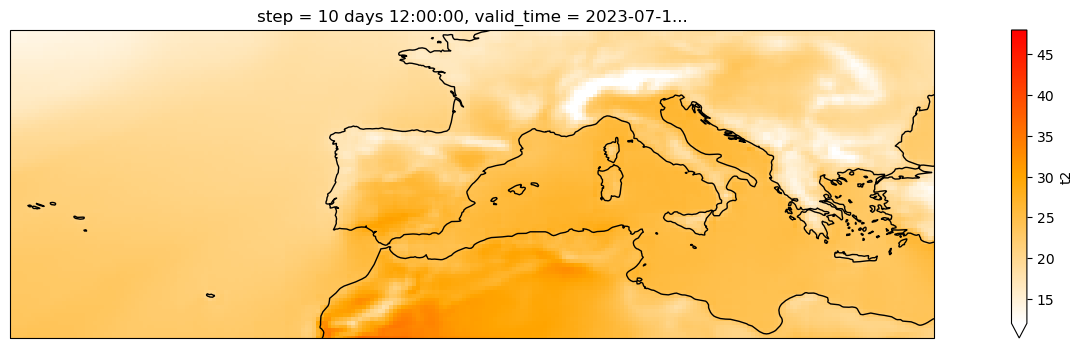

In [71]:
#Map of 2m temperature in C at step 1: July 12 Time Stamp 12:00:00
vmin = 12
vmax = 48
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-30, 30, 20, 50])
ax.set_ylim([30,50])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-');
(Pangu_July02.t2.sel(step=Pangu_July02.step[3])-273.15).plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)

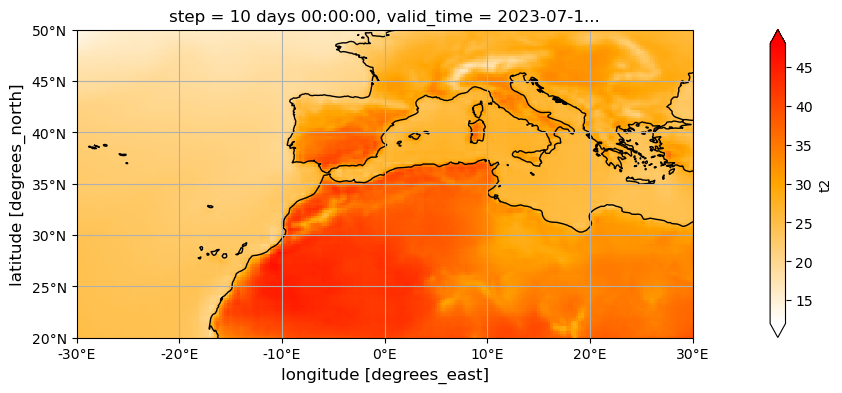

In [103]:
#Map of 2m temperature in C at step 1: July 12 Time Stamp 12:00:00
vmin = 12
vmax = 48
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_extent([-30, 30, 20, 50])
ax.set_ylim([30,50])
ax.gridlines(draw_labels=False)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
ax.set_title(rounded_time.values, fontsize=12)
(Pangu_July02.t2.sel(step=Pangu_July02.step[1])-273.15).plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)

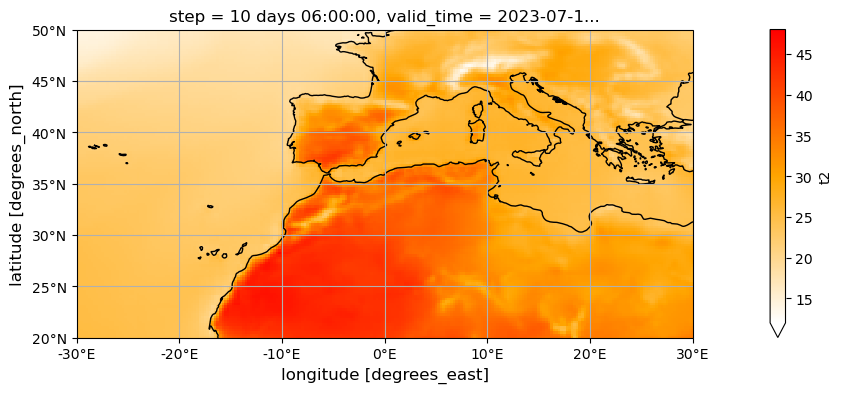

In [104]:
#Map of 2m temperature in C at step 1: July 12 Time Stamp 12:00:00
vmin = 12
vmax = 48
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_extent([-30, 30, 20, 50])
ax.set_ylim([30,50])
ax.gridlines(draw_labels=False)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
ax.set_title(rounded_time.values, fontsize=12)
(Pangu_July02.t2.sel(step=Pangu_July02.step[2])-273.15).plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)

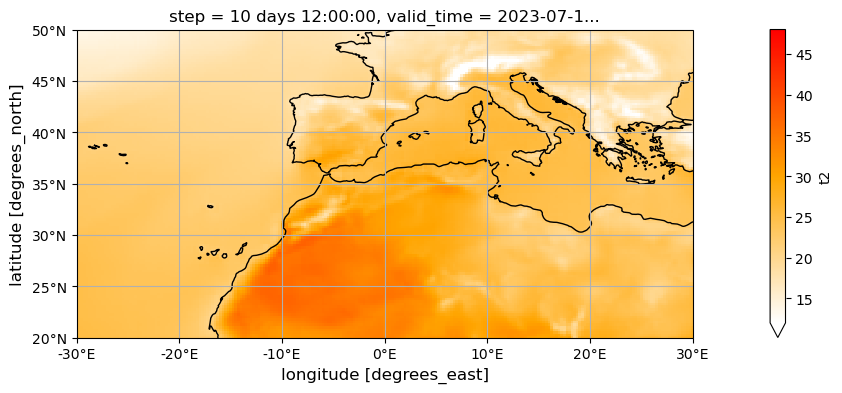

In [105]:
#Map of 2m temperature in C at step 1: July 12 Time Stamp 12:00:00
vmin = 12
vmax = 48
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_extent([-30, 30, 20, 50])
ax.set_ylim([30,50])
ax.gridlines(draw_labels=False)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
ax.set_title(rounded_time.values, fontsize=12)
(Pangu_July02.t2.sel(step=Pangu_July02.step[3])-273.15).plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)

In [22]:
file2='/scratch2/mfeldmann/seminar_mars/HW_EU_20230707.nc'
Pangu_July07 = xr.open_dataset(file2)
Pangu_July07.step
#Step 1-3

<xarray.DataArray 'step' (step: 14)>
array([410400000000000, 432000000000000, 453600000000000, 475200000000000,
       496800000000000, 518400000000000, 540000000000000, 561600000000000,
       583200000000000, 604800000000000, 626400000000000, 648000000000000,
       669600000000000, 691200000000000], dtype='timedelta64[ns]')
Coordinates:
  * step               (step) timedelta64[ns] 4 days 18:00:00 ... 8 days 00:0...
    valid_time         (step) datetime64[ns] ...
    time               datetime64[ns] ...
    meanSea            float64 ...
    heightAboveGround  float64 ...
Attributes:
    long_name:      time since forecast_reference_time
    standard_name:  forecast_period

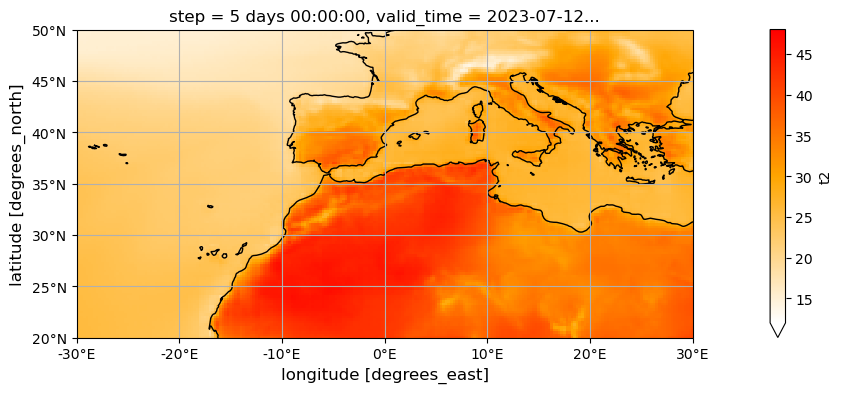

In [106]:
#Map of 2m temperature in C at step 1: July 12 Time Stamp 12:00:00
vmin = 12
vmax = 48
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_extent([-30, 30, 20, 50])
ax.set_ylim([30,50])
ax.gridlines(draw_labels=False)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
ax.set_title(rounded_time.values, fontsize=12)
(Pangu_July07.t2.sel(step=Pangu_July07.step[1])-273.15).plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)

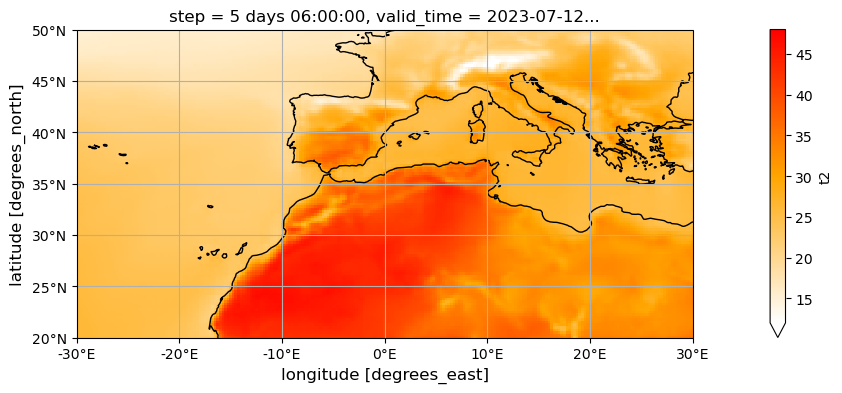

In [107]:
#Map of 2m temperature in C at step 2: July 12 Time Stamp 18:00:00
vmin = 12
vmax = 48
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_extent([-30, 30, 20, 50])
ax.set_ylim([30,50])
ax.gridlines(draw_labels=False)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
ax.set_title(rounded_time.values, fontsize=12)
(Pangu_July07.t2.sel(step=Pangu_July07.step[2])-273.15).plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)

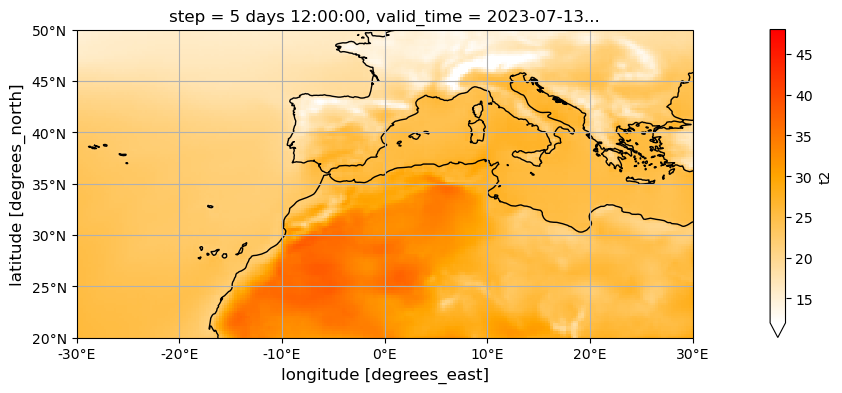

In [108]:
#Map of 2m temperature in C at step 2: July 13 Time Stamp 00:00:00
vmin = 12
vmax = 48
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_extent([-30, 30, 20, 50])
ax.set_ylim([30,50])
ax.gridlines(draw_labels=False)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
ax.set_title(rounded_time.values, fontsize=12)
(Pangu_July07.t2.sel(step=Pangu_July07.step[3])-273.15).plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)

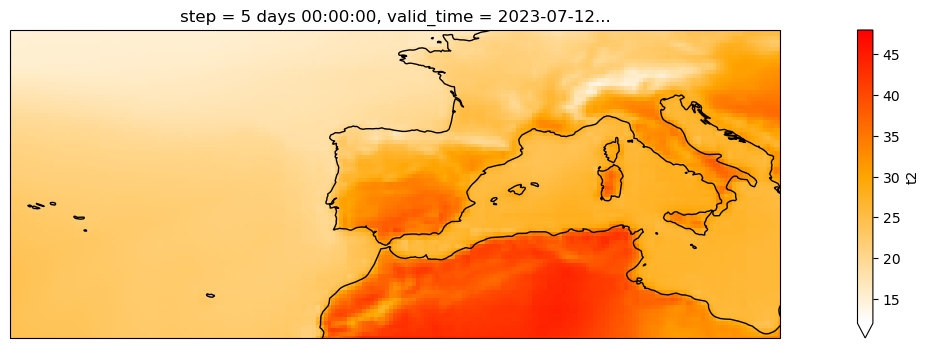

In [78]:
#Map of 2m temperature in C at step 1: July 12 Time Stamp 12:00:00
vmin = 12
vmax = 48
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-30, 30, 20, 50])
ax.set_xlim([-30,20])
ax.set_ylim([30,50])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-');
(Pangu_July07.t2.sel(step=Pangu_July07.step[1])-273.15).plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)

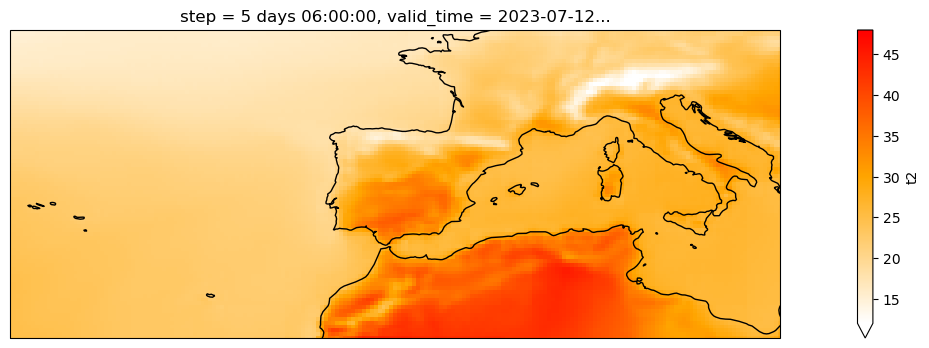

In [79]:
#Map of 2m temperature in C at step 1: July 12 Time Stamp 18:00:00
vmin = 12
vmax = 48
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-30, 30, 20, 50])
ax.set_xlim([-30,20])
ax.set_ylim([30,50])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-');
(Pangu_July07.t2.sel(step=Pangu_July07.step[2])-273.15).plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)

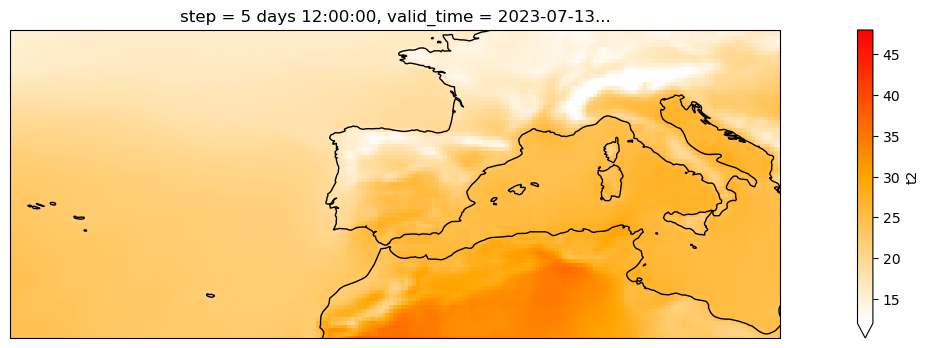

In [80]:
#Map of 2m temperature in C at step 1: July 13 00:00:00
vmin = 12
vmax = 48
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-30, 30, 20, 50])
ax.set_xlim([-30,20])
ax.set_ylim([30,50])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-');
(Pangu_July07.t2.sel(step=Pangu_July07.step[3])-273.15).plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)

In [11]:
file3='/scratch2/mfeldmann/seminar_mars/HW_EU_20230711.nc'
Pangu_July11 = xr.open_dataset(file3)
Pangu_July11

<xarray.Dataset>
Dimensions:            (longitude: 1440, latitude: 121, step: 14,
                        isobaricInhPa: 2)
Coordinates:
  * longitude          (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * latitude           (latitude) float64 50.0 49.75 49.5 ... 20.5 20.25 20.0
  * step               (step) timedelta64[ns] 0 days 06:00:00 ... 3 days 12:0...
    valid_time         (step) datetime64[ns] ...
  * isobaricInhPa      (isobaricInhPa) float64 850.0 500.0
    time               datetime64[ns] ...
    meanSea            float64 ...
    heightAboveGround  float64 ...
Data variables:
    msl                (step, latitude, longitude) float32 ...
    u10                (step, latitude, longitude) float32 ...
    v10                (step, latitude, longitude) float32 ...
    t2                 (step, latitude, longitude) float32 ...
    z                  (step, isobaricInhPa, latitude, longitude) float32 ...
    q                  (step, isobaricInhPa, latitude, longitude) float32 ...
    t                  (step, isobaricInhPa, latitude, longitude) float32 ...
    u                  (step, isobaricInhPa, latitude, longitude) float32 ...
    v                  (step, isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-03-12T12:05 GRIB to CDM+CF via cfgrib-0.9.1...

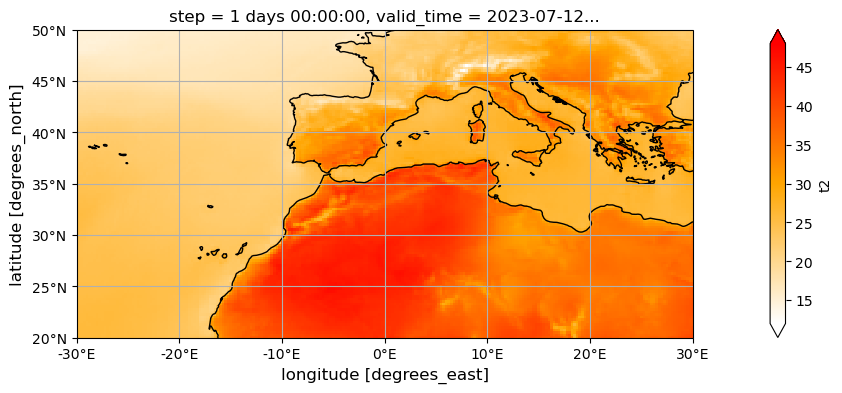

In [109]:
#Map of 2m temperature in C at step 1: July 12 Time Stamp 12:00:00
vmin = 12
vmax = 48
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_extent([-30, 30, 20, 50])
ax.set_ylim([30,50])
ax.gridlines(draw_labels=False)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
ax.set_title(rounded_time.values, fontsize=12)
(Pangu_July11.t2.sel(step=Pangu_July11.step[3])-273.15).plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)

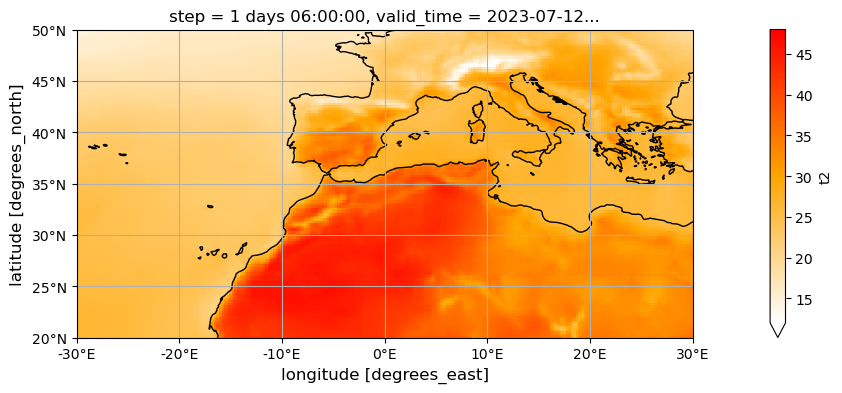

In [111]:
#Map of 2m temperature in C at step 1: July 12 Time Stamp 18:00:00
vmin = 12
vmax = 48
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_extent([-30, 30, 20, 50])
ax.set_ylim([30,50])
ax.gridlines(draw_labels=False)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
ax.set_title(rounded_time.values, fontsize=12)
(Pangu_July11.t2.sel(step=Pangu_July11.step[4])-273.15).plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)

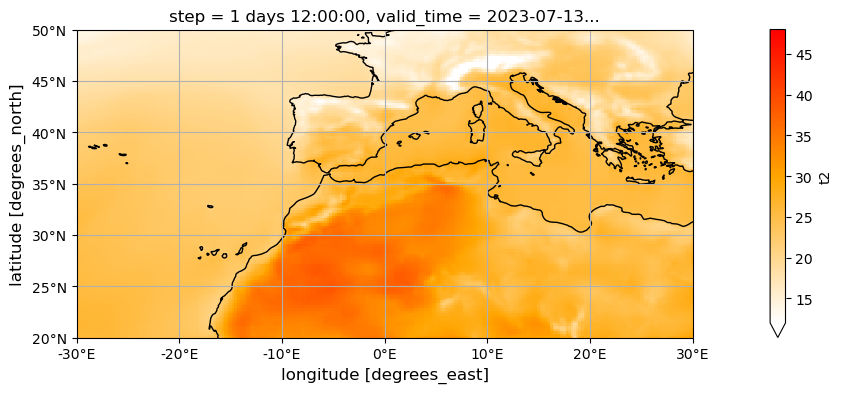

In [112]:
#Map of 2m temperature in C at step 1: July 13 Time Stamp 00:00:00
vmin = 12
vmax = 48
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_extent([-30, 30, 20, 50])
ax.set_ylim([30,50])
ax.gridlines(draw_labels=False)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.set_yticks(range(20, 51, 5))  # Add explicit ticks for the y-axis
ax.set_yticklabels([f'{lat}°N' for lat in range(20, 51, 5)], fontsize=10)  # Add explicit labels for the y-axis
ax.set_xticks(np.arange(-30, 31, 10))  # Add explicit ticks for the x-axis with 10 degree step
ax.set_xticklabels([f'{lon}°E' for lon in np.arange(-30, 31, 10)], fontsize=10)  # Add explicit labels for the x-axis
ax.set_title(rounded_time.values, fontsize=12)
(Pangu_July11.t2.sel(step=Pangu_July11.step[5])-273.15).plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)

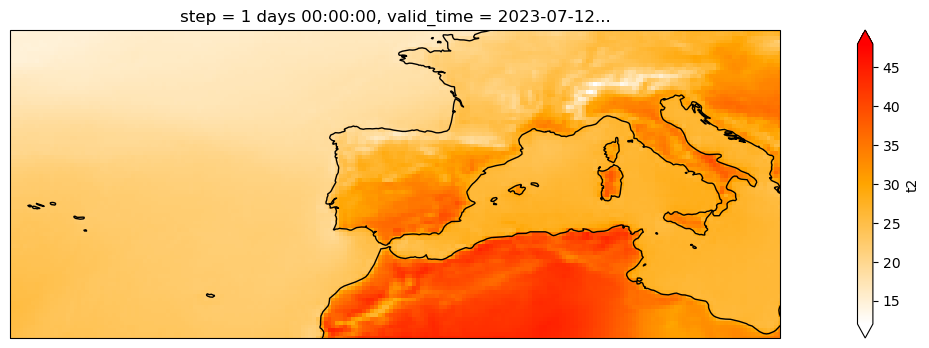

In [81]:
#Map of 2m temperature in C at step 3: July 12 12:00:00
vmin = 12
vmax = 48
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-30, 30, 20, 50])
ax.set_xlim([-30,20])
ax.set_ylim([30,50])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-');
(Pangu_July11.t2.sel(step=Pangu_July11.step[3])-273.15).plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)

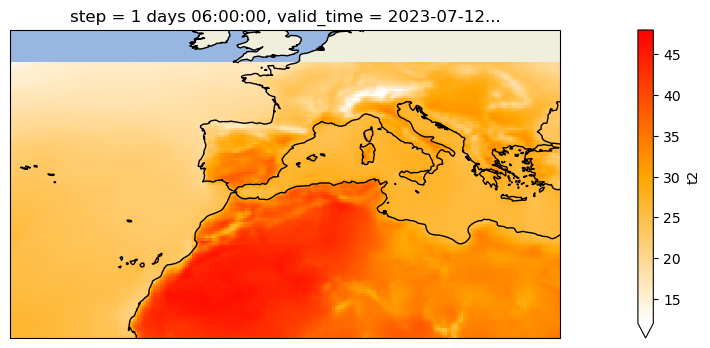

In [28]:
#Map of 2m temperature in C at step 3: July 12 18:00:00
vmin = 12
vmax = 48
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-30, 30, 20, 50])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-');
(Pangu_July11.t2.sel(step=Pangu_July11.step[4])-273.15).plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)

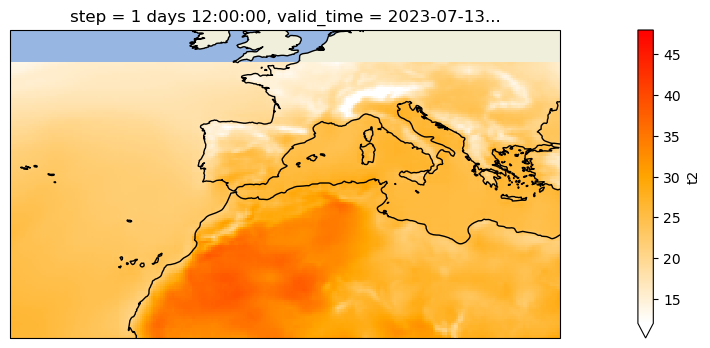

In [29]:
#Map of 2m temperature in C at step 3: July 13 00:00:00
vmin = 12
vmax = 48
cmap = colors.LinearSegmentedColormap.from_list('mycmap', ['white', 'orange', 'red'])
fig = plt.figure(figsize=[20,4])
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.set_extent([-30, 30, 20, 50])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linestyle='-');
(Pangu_July11.t2.sel(step=Pangu_July11.step[5])-273.15).plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)

In [13]:
ERA_data = xr.open_dataset('ERA_data_july_heatwaves.nc')
ERA_data

<xarray.Dataset>
Dimensions:  (time: 68, lat: 121, lon: 1440, level: 2)
Coordinates:
  * time     (time) datetime64[ns] 2023-07-01 ... 2023-07-17T18:00:00
  * lon      (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float32 20.0 20.25 20.5 20.75 21.0 ... 49.25 49.5 49.75 50.0
  * level    (level) int32 850 500
Data variables:
    u10      (time, lat, lon) float32 ...
    v10      (time, lat, lon) float32 ...
    msl      (time, lat, lon) float32 ...
    t2m      (time, lat, lon) float32 ...
    d2m      (time, lat, lon) float32 ...
    sp       (time, lat, lon) float32 ...
    tp       (time, lat, lon) float32 ...
    u        (time, level, lat, lon) float32 ...
    v        (time, level, lat, lon) float32 ...
    z        (time, level, lat, lon) float32 ...
    q        (time, level, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Thu Nov 16 12:50:50 2023: cdo -t ecmwf -chname,longitude,lo...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [36]:
ERA_July12_Noon = ERA_data.t2m.isel(time=46)
ERA_July12_Noon

<xarray.DataArray 't2m' (lat: 121, lon: 1440)>
[174240 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2023-07-12T12:00:00
  * lon      (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float32 20.0 20.25 20.5 20.75 21.0 ... 49.25 49.5 49.75 50.0
Attributes:
    long_name:  2 metre temperature
    units:      K

In [82]:
ERA_data = xr.open_dataset('ERA_data_july_heatwaves.nc')
ERA_data

<xarray.Dataset>
Dimensions:  (time: 68, lat: 121, lon: 1440, level: 2)
Coordinates:
  * time     (time) datetime64[ns] 2023-07-01 ... 2023-07-17T18:00:00
  * lon      (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float32 20.0 20.25 20.5 20.75 21.0 ... 49.25 49.5 49.75 50.0
  * level    (level) int32 850 500
Data variables:
    u10      (time, lat, lon) float32 ...
    v10      (time, lat, lon) float32 ...
    msl      (time, lat, lon) float32 ...
    t2m      (time, lat, lon) float32 ...
    d2m      (time, lat, lon) float32 ...
    sp       (time, lat, lon) float32 ...
    tp       (time, lat, lon) float32 ...
    u        (time, level, lat, lon) float32 ...
    v        (time, level, lat, lon) float32 ...
    z        (time, level, lat, lon) float32 ...
    q        (time, level, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Thu Nov 16 12:50:50 2023: cdo -t ecmwf -chname,longitude,lo...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [83]:
ERA_data_sel = ERA_data.sel(time=ERA_data.time[46:49])
ERA_data_sel

<xarray.Dataset>
Dimensions:  (time: 3, lat: 121, lon: 1440, level: 2)
Coordinates:
  * time     (time) datetime64[ns] 2023-07-12T12:00:00 ... 2023-07-13
  * lon      (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float32 20.0 20.25 20.5 20.75 21.0 ... 49.25 49.5 49.75 50.0
  * level    (level) int32 850 500
Data variables:
    u10      (time, lat, lon) float32 ...
    v10      (time, lat, lon) float32 ...
    msl      (time, lat, lon) float32 ...
    t2m      (time, lat, lon) float32 ...
    d2m      (time, lat, lon) float32 ...
    sp       (time, lat, lon) float32 ...
    tp       (time, lat, lon) float32 ...
    u        (time, level, lat, lon) float32 ...
    v        (time, level, lat, lon) float32 ...
    z        (time, level, lat, lon) float32 ...
    q        (time, level, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Thu Nov 16 12:50:50 2023: cdo -t ecmwf -chname,longitude,lo...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [87]:
### ERA Mean July 12 12:00:00 to July 13 00:00:00
ERA_data_sel = ERA_data.sel(time=ERA_data.time[46:49])
lon_range = slice(-35, 40)
lat_range = slice(20, 50)
temp = ERA_data_sel.t2m
temp_area = temp.sel(lon=lon_range, lat=lat_range)-273.15
mean_temperature_ERA_sel = temp_area.mean(dim=('lat', 'lon'))
mean_temperature_ERA_sel
df_mean_temperature_ERA_sel = pd.DataFrame(mean_temperature_ERA_sel)
print(df_mean_temperature_ERA_sel)

           0
0  28.736708
1  27.680067
2  24.023186


In [86]:
# Pangu Means July 12 12:00:00-July 13 00:00:00
ERA_data_sel = ERA_data.sel(time=ERA_data.time[46:49])
# Define the area of interest
area = [50, -35, 20, 40]  # North, West, South, East
temp_ERA = ERA_data_sel['t2m']
# Extract the subset for the specified area
temp_area_ERA = temp_ERA.sel(lat=slice(area[0], area[2]), lon=slice(area[1], area[3]))
# Calculate the mean temperature for the area for each time step
mean_temperature_ERA = temp_area_ERA.mean(dim=('lat', 'lon'))
mean_temperature_ERA
mean_temperature_ERA = mean_temperature_ERA.values - 273.15
df_mean_temperature_ERA = pd.DataFrame(mean_temperature_ERA)
print(df_mean_temperature_ERA)

    0
0 NaN
1 NaN
2 NaN


In [64]:
# Pangu Means July 12 12:00:00-July 13 00:00:00
Pangu_July02_sel = Pangu_July02.sel(step=Pangu_July02.step[1:4])
# Define the area of interest
area = [50, -35, 20, 40]  # North, West, South, East
temp1 = Pangu_July02_sel['t2']
# Extract the subset for the specified area
temp_area1 = temp1.sel(latitude=slice(area[0], area[2]), longitude=slice(area[1], area[3]))
# Calculate the mean temperature for the area for each time step
mean_temperature_Pangu1 = temp_area1.mean(dim=('latitude', 'longitude'))
mean_temperature_Pangu1
mean_temperature_Pangu_C1 = mean_temperature_Pangu1.values - 273.15
df_mean_temperature_Pangu_C1 = pd.DataFrame(mean_temperature_Pangu_C1)
print(df_mean_temperature_Pangu_C1)

           0
0  30.603149
1  28.301880
2  23.390961


In [63]:
# Pangu Means July 12 12:00:00-July 13 00:00:00
Pangu_July07_sel = Pangu_July07.sel(step=Pangu_July07.step[1:4])
# Define the area of interest
area = [50, -35, 20, 40]  # North, West, South, East
temp2 = Pangu_July07_sel['t2']
# Extract the subset for the specified area
temp_area2 = temp2.sel(latitude=slice(area[0], area[2]), longitude=slice(area[1], area[3]))
# Calculate the mean temperature for the area for each time step
mean_temperature_Pangu2 = temp_area2.mean(dim=('latitude', 'longitude'))
mean_temperature_Pangu2
mean_temperature_Pangu_C2 = mean_temperature_Pangu2.values - 273.15
df_mean_temperature_Pangu_C2 = pd.DataFrame(mean_temperature_Pangu_C2)
print(df_mean_temperature_Pangu_C2)

           0
0  31.441498
1  29.026886
2  24.190247


In [65]:
# Pangu Means July 12 12:00:00-July 13 00:00:00
Pangu_July11_sel = Pangu_July11.sel(step=Pangu_July11.step[3:6])
# Define the area of interest
area = [50, -35, 20, 40]  # North, West, South, East
temp3 = Pangu_July11_sel['t2']
# Extract the subset for the specified area
temp_area3 = temp3.sel(latitude=slice(area[0], area[2]), longitude=slice(area[1], area[3]))
# Calculate the mean temperature for the area for each time step
mean_temperature_Pangu3 = temp_area3.mean(dim=('latitude', 'longitude'))
mean_temperature_Pangu3
mean_temperature_Pangu_C3 = mean_temperature_Pangu3.values - 273.15
df_mean_temperature_Pangu_C3 = pd.DataFrame(mean_temperature_Pangu_C3)
print(df_mean_temperature_Pangu_C3)

           0
0  31.632172
1  29.321991
2  24.558655


In [88]:
### RMSD ERA & Pangu July 02 Lead Time
squared_diff = (df_mean_temperature_ERA_sel - df_mean_temperature_Pangu_C1) ** 2
    # Calculate the mean of the squared differences
mean_squared_diff = np.mean(squared_diff)
    # Calculate the square root of the mean squared difference to obtain RMSD
rmsd = np.sqrt(mean_squared_diff)
rmsd

#RMSD is 1.19303

/usr/local/miniconda3/envs/cra_env_2023/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0    1.19303
dtype: float32

In [89]:
### RMSD ERA & Pangu July 02 Lead Time
squared_diff = (df_mean_temperature_ERA_sel - df_mean_temperature_Pangu_C2) ** 2
    # Calculate the mean of the squared differences
mean_squared_diff = np.mean(squared_diff)
    # Calculate the square root of the mean squared difference to obtain RMSD
rmsd = np.sqrt(mean_squared_diff)
rmsd

#RMSD is 1.747162

/usr/local/miniconda3/envs/cra_env_2023/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0    1.747162
dtype: float32

In [90]:
### RMSD ERA & Pangu July 02 Lead Time
squared_diff = (df_mean_temperature_ERA_sel - df_mean_temperature_Pangu_C3) ** 2
    # Calculate the mean of the squared differences
mean_squared_diff = np.mean(squared_diff)
    # Calculate the square root of the mean squared difference to obtain RMSD
rmsd = np.sqrt(mean_squared_diff)
rmsd

#RMSD is 1.94648?

/usr/local/miniconda3/envs/cra_env_2023/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0    1.94648
dtype: float32

In [92]:
#Pattern of Correlation - Not Working

# Extract the variables of interest
var1 = temp_area_ERA
var2 = temp_area3

# Define latitude weights (e.g., cosine of latitude)
weights = np.cos(np.deg2rad(temp_ERA.lat))

# Compute the area-weighted mean for each variable
weighted_var1 = (var1 * weights).mean(dim=('lat', 'lon'))
weighted_var2 = (var2 * weights).mean(dim=('lat', 'longitude'))

# Compute the pattern correlation between the two variables
pattern_corr = np.corrcoef(weighted_var1.values, weighted_var2.values)[0, 1]
pattern_corr

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 1 has size 121

In [52]:
Pangu_July02_sel = Pangu_July02.sel(step=Pangu_July02.step[1:4])
lon_range = slice(-35, 40)
lat_range = slice(20, 50)
temp = Pangu_July02_sel.t2
temp_area = temp.sel(longitude=lon_range, latitude=lat_range)-273.15
mean_temperature_Pangu_July02 = temp_area.mean(dim=('latitude', 'longitude'))
mean_temperature_Pangu_July02

<xarray.DataArray 't2' (step: 3)>
array([nan, nan, nan], dtype=float32)
Coordinates:
  * step               (step) timedelta64[ns] 10 days 00:00:00 ... 10 days 12...
    valid_time         (step) datetime64[ns] ...
    time               datetime64[ns] ...
    meanSea            float64 ...
    heightAboveGround  float64 ...